In [39]:
# Student ID: 20753428
from qutip import *
import numpy as np

# Problem 3
In this problem, the notation of a state adapts the following way:
$$\left | x \right > = \left | x_0 x_1 x_2 ... x_d \right >
$$
## (a)
### $X_4$
#### Circuit Diagram

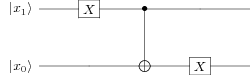

In [50]:
qc = QubitCircuit(2)
qc.add_gate("X", targets=1)
qc.add_gate("CNOT", targets=0,controls=1)
qc.add_gate("X", targets=0)
qc.input_states = ["x_0","x_1"]
qc.png

#### Verify Circuit Matrix

In [3]:
# tensor(sigmax(), identity(2))*cnot(target=0,control=1)*tensor(identity(2), sigmax())
gate_sequence_product(qc.propagators())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.  0.  0.  1.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]

### $Z_4$
#### Circuit Diagram

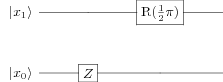

In [4]:
qc2 = QubitCircuit(2)
qc2.add_gate("Z", targets=0)
qc2.add_gate("PHASEGATE", 1, None,0.5*np.pi, r"\frac{1}{2}\pi")
qc2.input_states = ["x_0","x_1"]
qc2.png

#### Verify Circuit Matrix

In [5]:
# tensor(sigmaz(), phasegate(0.5*np.pi))
gate_sequence_product(qc2.propagators())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.-1.j]]

## (b)
### $X_8$
#### Circuit Diagram

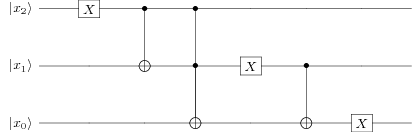

In [6]:
qc3 = QubitCircuit(3)
qc3.add_gate("X", targets=2)
qc3.add_gate("CNOT", targets=1,controls=2)
qc3.add_gate("TOFFOLI", targets=0,controls=[1,2])
qc3.add_gate("X", targets=1)
qc3.add_gate("CNOT", targets=0,controls=1)
qc3.add_gate("X", targets = 0)
qc3.input_states = ["x_0","x_1", "x_2"]
qc3.png

In [38]:
cnot(control=2, target=1,N=3)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]]

In [7]:
gate_sequence_product(qc3.propagators())

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]]

#### Verify Circuit Matrix

In [8]:
gate_sequence_product(qc3.propagators())

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]]

#### Alternative Solution: Without Using Toffoli gates
Below is the Toffoli gate equivalent circuit:

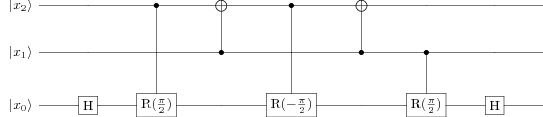

In [9]:
# ref: https://math.stackexchange.com/questions/1024780/toffoli-gates-can-be-decomposed-into-
#      single-and-two-qubit-gates
qc_toffoli = QubitCircuit(3)
qc_toffoli.add_gate("SNOT", targets=0)
qc_toffoli.add_gate("CPHASE", 0,2, np.pi/2,r'\frac{\pi}{2}')
qc_toffoli.add_gate("CNOT", 2,1)
qc_toffoli.add_gate("CPHASE", 0,2, -np.pi/2,r'-\frac{\pi}{2}')
qc_toffoli.add_gate("CNOT", 2,1)
qc_toffoli.add_gate("CPHASE", 0,1, np.pi/2,r'\frac{\pi}{2}')
qc_toffoli.add_gate("SNOT", targets=0)
qc_toffoli.input_states = ["x_0","x_1", "x_2"]
qc_toffoli.png

Verify:

In [10]:
print "The circuit is equivalent to the toffoli gate: {0}".format(\
gate_sequence_product(qc_toffoli.propagators()) == \
toffoli(target=0,controls=[1,2]))

The circuit is equivalent to the toffoli gate: True


The $X_8$ circuit then become:

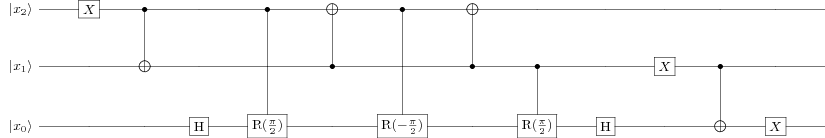

In [11]:
qc3_alt = QubitCircuit(3)
qc3_alt.add_gate("X", targets=2)
qc3_alt.add_gate("CNOT", targets=1,controls=2)
qc3_alt.add_circuit(qc_toffoli)
qc3_alt.add_gate("X", targets=1)
qc3_alt.add_gate("CNOT", targets=0,controls=1)
qc3_alt.add_gate("X", targets = 0)
qc3_alt.input_states = ["x_0","x_1", "x_2"]
qc3_alt.png

Circuit Matrix:

In [12]:
gate_sequence_product(qc3_alt.propagators())

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]]

### $Z_8$
#### Circuit Diagram

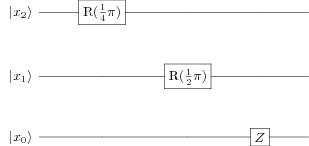

In [13]:
qc4 = QubitCircuit(3)
qc4.add_gate("PHASEGATE", 2 , None, np.pi/4, r"\frac{1}{4}\pi" )
qc4.add_gate("PHASEGATE", 1 , None, np.pi/2, r"\frac{1}{2}\pi")
qc4.add_gate("Z", targets=0)
qc4.input_states = ["x_0","x_1", "x_2"]
qc4.png

#### Verify Circuit Matrix

In [14]:
gate_sequence_product(qc4.propagators())

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 1.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.70710678+0.70710678j  0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+1.j
   0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  -0.70710678+0.70710678j  0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
   0.00000000+0.j         -1.00000000+0.j          0.00000000+0.j
   0.00000000+0.j          0.0000